<a href="https://colab.research.google.com/github/seeker-99/diving-deep-in-learning/blob/main/Module_3_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plotting Sigmoid Neuron Function**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [ ]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

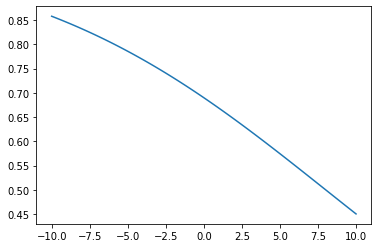

In [ ]:
w = -0.1 #@param {type: "slider", min: -2, max: 2, step:0.1}
# Here this comments provides a slider within ra range and steps and puts it as the value of w
b = 0.8 #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10, 10, 100) # Linearly spaced points between -10 to 10 and here 100 points
Y = sigmoid(X, w, b)
plt.plot(X, Y)
plt.show()


In [ ]:
def sigmoid_2d(x1, x2, w1, w2 ,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [ ]:
sigmoid_2d(1, 0, 0.5 ,0, 0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 80)
XX1, XX2 =np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [ ]:
w1 = 0.5
w2 = 2  # making wi<wj results in wieghtage of one over other thus impacting the variation of one wrt other
b =-5
Y =sigmoid_2d(XX1, XX2, w1, w2, b)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red", "yellow", "green"]) # Define your own custom cmap

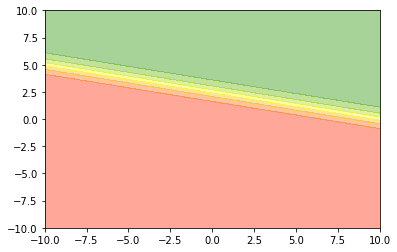

In [ ]:
plt.contourf(XX1, XX2, Y, cmap=my_cmap, alpha = 0.4) #alpha for transparency  # fills output as a color map for contour plot
plt.show() # W increase means faster transition of sigmoid

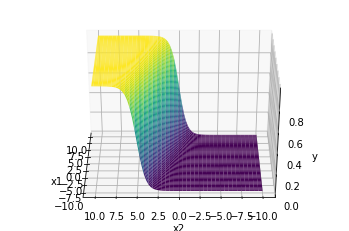

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax.contour3D(XX1, XX2, Y,200, cmap = 'viridis') #Y ke baad wala value density type h (continuous curve)
ax.plot_surface(XX1, XX2, Y, cmap = 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 180) #Height, Rotation of plot abt z axis

# **Compute Loss for a given Dataset**

In [ ]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 -10 # Random generates fxn in a range here we want from -10 to 10 (Length of range is 20) and -10(so that it is averaged at 0)
Y = sigmoid(X ,w_unknown, b_unknown)

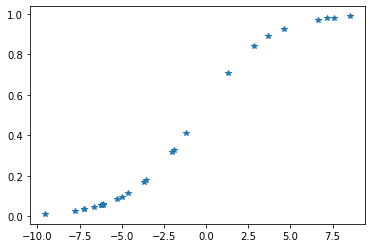

In [ ]:
plt.plot(X, Y, '*')
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
  loss= 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [ ]:
W =np.linspace(0, 2, 102) # W =np.linspace(-1, 1, 100) as after plotting we see that negative values of w give high loss so we refine the range of values
B =np.linspace(-1, 1, 102)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i,j], BB[i,j])



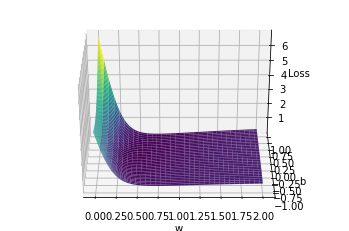

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
#ax.contour3D(XX1, XX2, Y,200, cmap = 'viridis') #Y ke baad wala value density type h (continuous curve)
ax.plot_surface(WW, BB, Loss, cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30, 270) #Height, Rotation of plot abt z axis

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1])) #int typecasting them so as to provide in matrix index as float not allowed
j = int(ij -  i * Loss.shape[1])

In [ ]:
print(i, j)

63 25


In [ ]:
print(WW[i,j], BB[i,j])   #Here

0.49504950495049505 0.24752475247524752


# **Class for Sigmoid Neuron**

In [ ]:
class sigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):               # wx + b part in sigmoid fxn is just the perceptron thing
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self,x):                   # 1/(!+e^-x) is the sigmoid fxn
    return 1.0/(1.0 + np.exp(-x))        #1.0 instead of 1 so as to obtain a floating output as sigmoid's gonna be b/w 0 and 1

  def grad_w(self,x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1- y_pred) * x

  def grad_b(self,x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1- y_pred)

  def fit(self, X, Y, epochs=1, lr=1, initialize = True):
    #initialize w,b
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw
      self.b -= lr * db


# **Fit for Toy Data**

In [ ]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1,0, 0, 0]


In [ ]:
sn = sigmoidNeuron()

In [ ]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha =0.6)
    ax.scatter(X[:, 0], X[:,1],c=Y, cmap='viridis' )
    ax.plot()

In [ ]:
plt.subplot?

[[-0.65342697  0.29316961]] [-0.00334295]
[[-0.15679874  0.09729246]] [-0.03280393]
[[ 0.65045436 -0.30969387]] [-0.02020482]
[[ 0.84432747 -0.17225287]] [-0.07143968]
[[ 0.88276941 -0.40419035]] [-0.13041553]
[[ 1.03673191 -0.24041155]] [-0.17465904]
[[ 1.05377841 -0.43227915]] [-0.22703318]
[[ 1.16391881 -0.32340238]] [-0.26487637]
[[ 1.18930125 -0.42978344]] [-0.30643285]
[[ 1.25771546 -0.39330771]] [-0.33877844]
[[ 1.29349332 -0.43417704]] [-0.37123007]
[[ 1.33874845 -0.43634783]] [-0.39962535]
[[ 1.37556173 -0.45258812]] [-0.42655559]
[[ 1.41147009 -0.4630085 ]] [-0.45141716]
[[ 1.44458272 -0.47399182]] [-0.4746983]
[[ 1.47573901 -0.48403929]] [-0.49650368]
[[ 1.50505714 -0.49353679]] [-0.51699994]
[[ 1.53274673 -0.5025022 ]] [-0.53631653]
[[ 1.55897111 -0.51099336]] [-0.55456788]
[[ 1.58387194 -0.51905598]] [-0.57185356]
[[ 1.60757163 -0.52672981]] [-0.58826074]
[[ 1.63017669 -0.53404939]] [-0.60386605]
[[ 1.65178035 -0.54104496]] [-0.61873712]
[[ 1.67246465 -0.54774314]] [-0.632

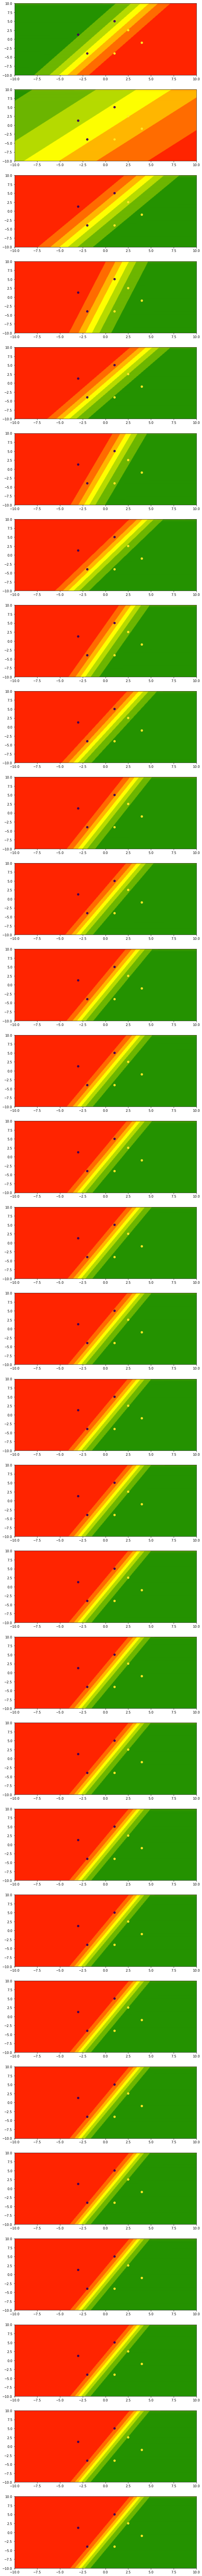

In [ ]:
sn.fit(X, Y, 1, 0.05, True)
N = 30                                    # Finally we decided to keep smaller lr initially and then bigger so that it learns less in the first and then learns more
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N+1, 1, i + 2)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# **Load Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.transform?

In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
#ax.set_xlim((0,2))
#ax.set_ylim((-2,2))
line, = ax.plot( [], [], lw = 2)


In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True) #blit = true means plot only that changes

In [ ]:
HTML(anim.to_html5_video())